--- Análisis de Datos ---

Primeras 5 filas del dataset:
     País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0   Chile   71    22       79           61       70    58        79     69
1    EEUU   34    41       40           79       74    37        90     23
2  México   91    72       52           99       83    23        63     21
3   Corea   80    21       95           34       22    79        27     25
4   Japón   40    49       77           81       70    33        66     73

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         8 non-null      object
 1   Pop          8 non-null      int64 
 2   Rock         8 non-null      int64 
 3   Hip-Hop      8 non-null      int64 
 4   Electrónica  8 non-null      int64 
 5   Clásica      8 non-null      int64 
 6   Jazz         8 non-null      int

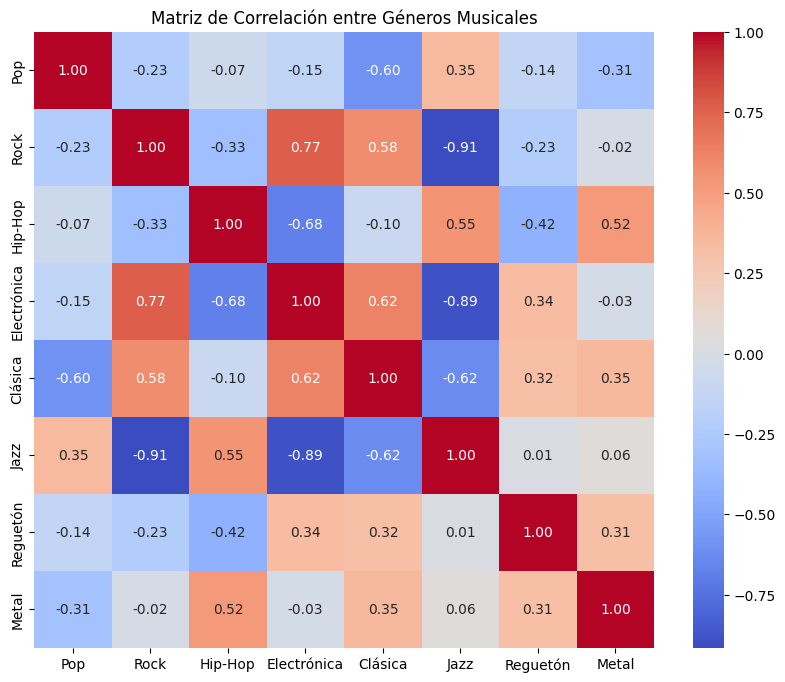

In [1]:
# 1. Carga y exploración de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar el dataset
try:
    df = pd.read_csv('dataset_generos_musicales.csv')
except FileNotFoundError:
    print("El archivo no se encuentra.")

# --- Análisis Exploratorio de Datos ---
print("--- Análisis de Datos ---")
print("\nPrimeras 5 filas del dataset:")
print(df.head())

print("\nInformación del DataFrame:")
df.info()

print("\nEstadísticas descriptivas de los géneros musicales:")
print(df.describe())

# Visualizar la matriz de correlación
# Primero, excluimos la columna 'País' para la correlación
df_numeric = df.drop('País', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Géneros Musicales')
plt.show()

# Preparar los datos para el clustering (escalar las características)
features = df_numeric.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=features)


--- K-Means Clustering ---

Resultados de K-Means con K=3:
Cluster 0: ['EEUU', 'México', 'Alemania']
Cluster 1: ['Chile', 'Corea', 'Rusia']
Cluster 2: ['Japón', 'Italia']

--------------------------------------------------------------------------------------------------------------------------------------------


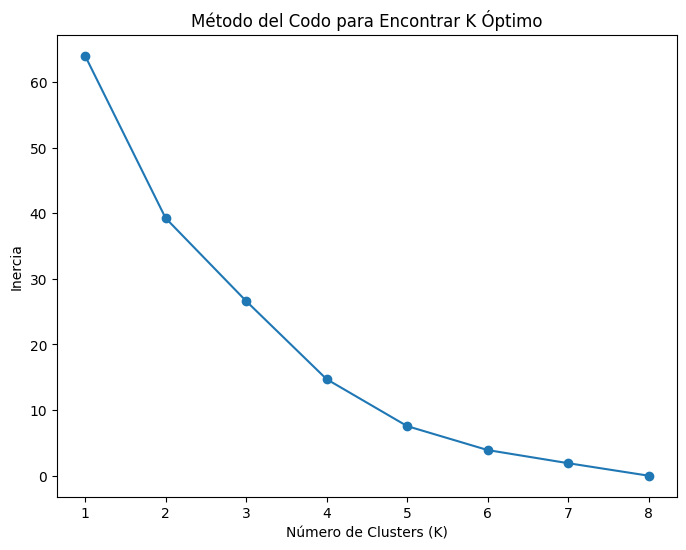


--------------------------------------------------------------------------------------------------------------------------------------------



Resultados de K-Means con K óptimo (2):
Cluster 0: ['EEUU', 'México', 'Japón', 'Alemania', 'Italia']
Cluster 1: ['Chile', 'Corea', 'Rusia']


In [8]:
# 2. Aplicación de algoritmos de clusterización

# --- K-Means Clustering ---

print("\n--- K-Means Clustering ---")
# 1. Aplicar K-Means con K=3
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_K3_Cluster'] = kmeans_k3.fit_predict(df_scaled)
print("\nResultados de K-Means con K=3:")
for i in range(3):
    countries_in_cluster = list(df[df['KMeans_K3_Cluster'] == i]['País'])
    if countries_in_cluster:
        print(f"Cluster {i}: {countries_in_cluster}")

print("\n--------------------------------------------------------------------------------------------------------------------------------------------")

# 2. Determinar el valor óptimo de K
# Método del Codo
inertia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(range(1, 9))
plt.show()

# Coeficiente de Silueta (CORREGIDO)
silhouette_scores = []
# El número de muestras (n_samples) es 8, por lo que k debe ser de 2 a 7.
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

print("\n--------------------------------------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta para Encontrar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(range(2, 8))
plt.show()

# En base a los gráficos, seleccionamos el K óptimo.
optimal_k = 2
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Optimal_Cluster'] = kmeans_optimal.fit_predict(df_scaled)
print(f"\nResultados de K-Means con K óptimo ({optimal_k}):")
for i in range(optimal_k):
    countries_in_cluster = list(df[df['KMeans_Optimal_Cluster'] == i]['País'])
    if countries_in_cluster:
        print(f"Cluster {i}: {countries_in_cluster}")

In [7]:
#2. Aplicación de algoritmos de clusterización

# --- Clustering Jerárquico ---
print("\n--- Clustering Jerárquico ---")
# Generar el dendrograma
plt.figure(figsize=(12, 8))
linked = linkage(df_scaled, method='ward')
dendrogram(linked, orientation='top', labels=list(df['País']), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.show()

# Aplicar AgglomerativeClustering
n_clusters_hierarchical = 2
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
df['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(df_scaled)
print(f"\nResultados de Clustering Jerárquico con {n_clusters_hierarchical} clusters:")
for i in range(n_clusters_hierarchical):
    countries_in_cluster = list(df[df['Hierarchical_Cluster'] == i]['País'])
    if countries_in_cluster:
        print(f"Cluster {i}: {countries_in_cluster}")

# Comparación con K-Means
print("\nComparación de resultados:")
print(f"K-Means (K={optimal_k}):")
for i in range(optimal_k):
    print(f"  Cluster {i}: {list(df[df['KMeans_Optimal_Cluster'] == i]['País'])}")
print(f"Clustering Jerárquico (K={n_clusters_hierarchical}):")
for i in range(n_clusters_hierarchical):
    print(f"  Cluster {i}: {list(df[df['Hierarchical_Cluster'] == i]['País'])}")


--- Clustering Jerárquico ---



Resultados de Clustering Jerárquico con 2 clusters:
Cluster 0: ['EEUU', 'México', 'Japón', 'Alemania', 'Italia']
Cluster 1: ['Chile', 'Corea', 'Rusia']

Comparación de resultados:
K-Means (K=2):
  Cluster 0: ['EEUU', 'México', 'Japón', 'Alemania', 'Italia']
  Cluster 1: ['Chile', 'Corea', 'Rusia']
Clustering Jerárquico (K=2):
  Cluster 0: ['EEUU', 'México', 'Japón', 'Alemania', 'Italia']
  Cluster 1: ['Chile', 'Corea', 'Rusia']


In [9]:
# 2. Aplicación de algoritmos de clusterización

# --- DBSCAN Clustering ---

print("\n--- DBSCAN Clustering ---")

min_pts_values = [2, 3] # Ajustamos MinPts a valores más razonables para un dataset pequeño
eps_values = [0.5, 0.7, 1.0, 1.5, 2.0] # Añadimos más valores de eps

for min_pts in min_pts_values:
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        dbscan_clusters = dbscan.fit_predict(df_scaled)

        n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
        n_noise = list(dbscan_clusters).count(-1)

        print(f"\nResultados para eps={eps} y MinPts={min_pts}:")
        print(f"Número de clusters encontrados: {n_clusters}")
        print(f"Número de puntos de ruido: {n_noise}")

        unique_labels = set(dbscan_clusters)
        for label in unique_labels:
            if label == -1:
                countries_in_cluster = list(df[dbscan_clusters == label]['País'])
                if countries_in_cluster:
                    print(f"  Ruido (-1): {countries_in_cluster}")
            else:
                countries_in_cluster = list(df[dbscan_clusters == label]['País'])
                if countries_in_cluster:
                    print(f"  Cluster {label}: {countries_in_cluster}")


--- DBSCAN Clustering ---

Resultados para eps=0.5 y MinPts=2:
Número de clusters encontrados: 0
Número de puntos de ruido: 8
  Ruido (-1): ['Chile', 'EEUU', 'México', 'Corea', 'Japón', 'Alemania', 'Rusia', 'Italia']

Resultados para eps=0.7 y MinPts=2:
Número de clusters encontrados: 0
Número de puntos de ruido: 8
  Ruido (-1): ['Chile', 'EEUU', 'México', 'Corea', 'Japón', 'Alemania', 'Rusia', 'Italia']

Resultados para eps=1.0 y MinPts=2:
Número de clusters encontrados: 0
Número de puntos de ruido: 8
  Ruido (-1): ['Chile', 'EEUU', 'México', 'Corea', 'Japón', 'Alemania', 'Rusia', 'Italia']

Resultados para eps=1.5 y MinPts=2:
Número de clusters encontrados: 0
Número de puntos de ruido: 8
  Ruido (-1): ['Chile', 'EEUU', 'México', 'Corea', 'Japón', 'Alemania', 'Rusia', 'Italia']

Resultados para eps=2.0 y MinPts=2:
Número de clusters encontrados: 1
Número de puntos de ruido: 6
  Cluster 0: ['Japón', 'Italia']
  Ruido (-1): ['Chile', 'EEUU', 'México', 'Corea', 'Alemania', 'Rusia']

Res


--- Reducción de Dimensionalidad con PCA ---
Varianza explicada por cada componente principal:
[4.60257113e-01 2.37246171e-01 1.73514851e-01 8.57029997e-02
 3.33293233e-02 6.41879028e-03 3.53075233e-03 9.19374605e-35]

Varianza acumulada:
[0.46025711 0.69750328 0.87101813 0.95672113 0.99005046 0.99646925
 1.         1.        ]

Se necesitan 4 componentes principales para explicar al menos el 90% de la varianza.


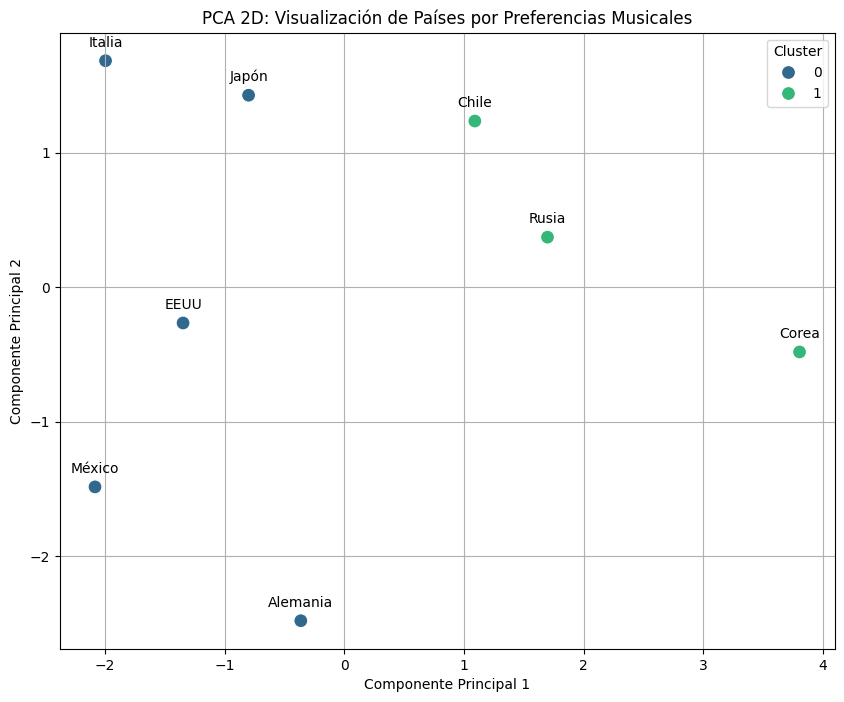

In [10]:
# 3. Aplicación de reducción de dimensionalidad

# --- PCA ---
print("\n--- Reducción de Dimensionalidad con PCA ---")
pca = PCA()
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente principal:")
print(explained_variance)
print("\nVarianza acumulada:")
print(cumulative_variance)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nSe necesitan {n_components_90} componentes principales para explicar al menos el 90% de la varianza.")

pca_2d = PCA(n_components=2)
countries_pca = pca_2d.fit_transform(df_scaled)
df_pca = pd.DataFrame(countries_pca, columns=['PC1', 'PC2'])
df_pca['País'] = df['País']
df_pca['Cluster'] = df['KMeans_Optimal_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
for i, country in enumerate(df_pca['País']):
    plt.annotate(country, (df_pca['PC1'][i], df_pca['PC2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('PCA 2D: Visualización de Países por Preferencias Musicales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


--- Reducción de Dimensionalidad con t-SNE ---

--------------------------------------------------------------------------------------------------------------------------------------------


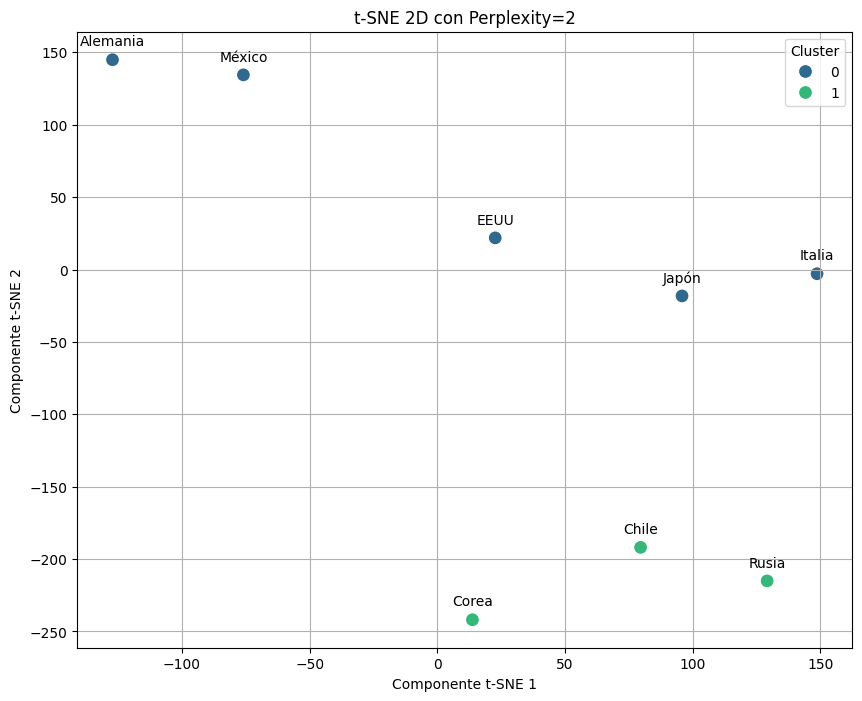


--------------------------------------------------------------------------------------------------------------------------------------------


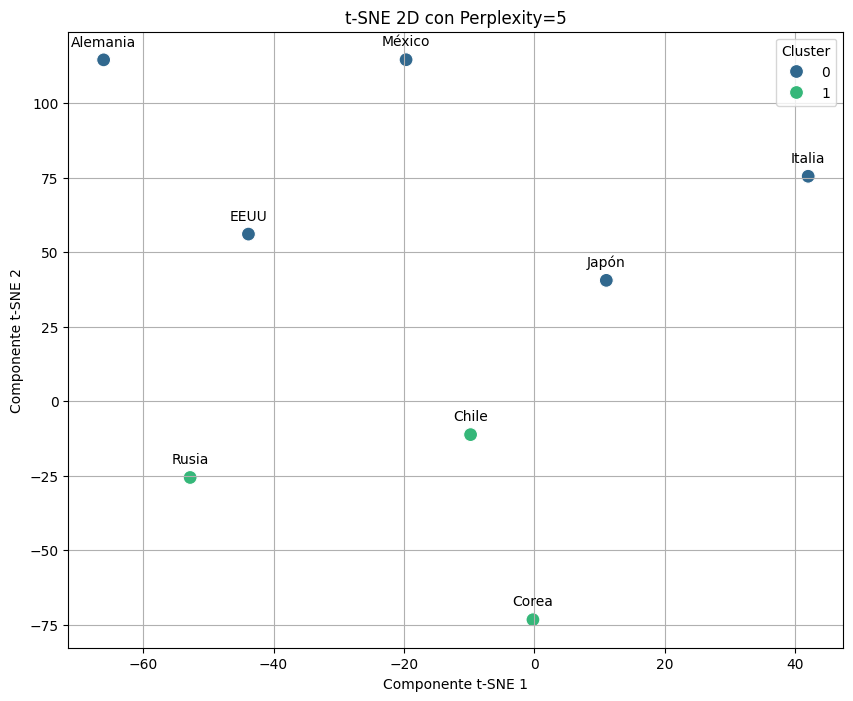

Saltando t-SNE para perplexity=7 ya que es demasiado alto para el dataset.


In [12]:
# 3. Aplicación de reducción de dimensionalidad

# --- t-SNE ---
print("\n--- Reducción de Dimensionalidad con t-SNE ---")

perplexities = [2, 5, 7] # Ajustado a valores razonables para el dataset. 7 es n_samples-1.
for perplexity in perplexities:
    if perplexity >= len(df_scaled) - 1:
        print(f"Saltando t-SNE para perplexity={perplexity} ya que es demasiado alto para el dataset.")
        continue
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, init='pca')
    countries_tsne = tsne.fit_transform(df_scaled)
    df_tsne = pd.DataFrame(countries_tsne, columns=['TSNE1', 'TSNE2'])
    df_tsne['País'] = df['País']
    df_tsne['Cluster'] = df['KMeans_Optimal_Cluster']

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', s=100)

    print("\n--------------------------------------------------------------------------------------------------------------------------------------------")


    for i, country in enumerate(df_tsne['País']):
        plt.annotate(country, (df_tsne['TSNE1'][i], df_tsne['TSNE2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title(f't-SNE 2D con Perplexity={perplexity}')
    plt.xlabel('Componente t-SNE 1')
    plt.ylabel('Componente t-SNE 2')
    plt.grid(True)
    plt.show()